In [2]:
import pandas as pd
import datetime
from datetime import datetime
%matplotlib inline

In [3]:
data = pd.read_csv('tmp7fvq8np9.csv')

/Users/pujaarajan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# General Data Analysis

In [4]:
data.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source'],
      dtype='object')

In [5]:
min(data['open_dt'])

'2011-07-01 01:32:33'

In [6]:
max(data['open_dt'])

'2019-02-03 23:57:43'

In [7]:
data.shape

(1438612, 29)

# What general trends do you see in constituent engagement?

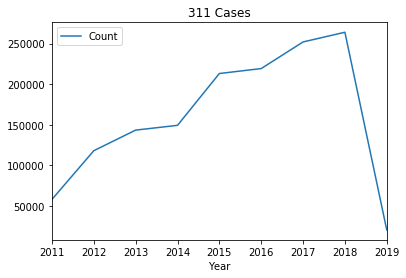

In [11]:
data['open_dt'] = pd.to_datetime(data['open_dt'])
data['open_dt_year'] = data['open_dt'].apply(lambda s: s.year)
year_data = data[['open_dt_year', 'case_enquiry_id']]
year_data.columns = ['Year','Count']
year_calls = year_data.groupby('Year').count()
year_calls.plot(title = '311 Cases')

# What services are people requesting?

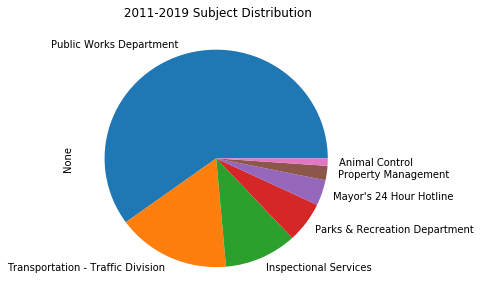

In [187]:
data.groupby(['subject']).size().sort_values(ascending=False)[:7].plot.pie(figsize=(5, 5), title = ' 2011-2019 Subject Distribution')

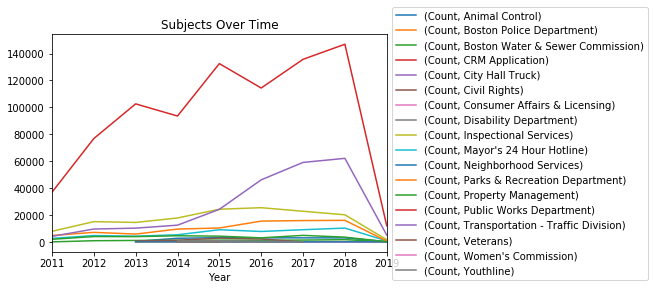

In [49]:
subject_year_data = data[['subject', 'open_dt_year', 'case_enquiry_id']]
subject_year_data.columns = ['Subject','Year','Count']
subject_year_data.groupby(['Subject','Year']).agg('count').unstack(level=0).plot(legend = False, title = 'Subjects Over Time').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# What do you see at a neighborhood level? 

In [17]:
data.groupby(['neighborhood']).size().sort_values(ascending=False)

neighborhood
Dorchester                                      210480
Roxbury                                         128840
Allston / Brighton                              102947
South Boston / South Boston Waterfront           96527
Jamaica Plain                                    96493
Downtown / Financial District                    86451
East Boston                                      78393
West Roxbury                                     68208
Hyde Park                                        68109
South End                                        67159
Greater Mattapan                                 66141
Back Bay                                         65991
Roslindale                                       60317
Charlestown                                      44177
Beacon Hill                                      37319
Boston                                           35454
Fenway / Kenmore / Audubon Circle / Longwood     32541
Mission Hill                                     259

In [ ]:
data.groupby(['neighborhood']).size().sort_values(ascending=False).plot.pie(figsize=(5, 5), title = ' 2011-2019 Subject Distribution')

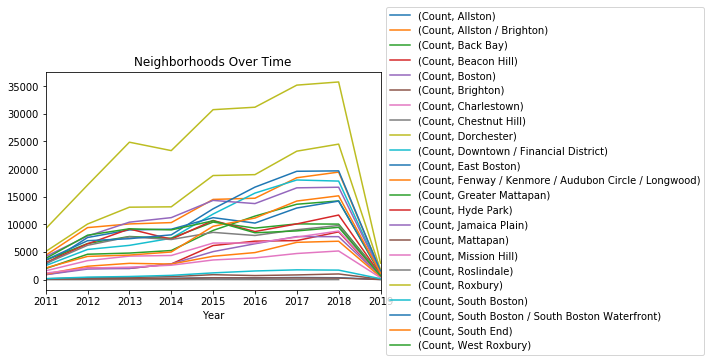

In [48]:
neighborhood_year_data = data[['neighborhood', 'open_dt_year', 'case_enquiry_id']]
neighborhood_year_data.columns = ['Neighborhood', 'Year', 'Count']
neighborhood_year_data.groupby(['Neighborhood','Year']).agg('count').unstack(level=0).plot(legend = True, title = 'Neighborhoods Over Time').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Is there a disparity in the kinds of cases or particular locations where people submit photos?

In [50]:
data.groupby(['submittedphoto', 'type']).size().sort_values(ascending=False)

submittedphoto                                                                                                      type                               
https://311.boston.gov/media/boston/report/photos/59c558ec04856dbbdac79373/report.jpg                               Needle Pickup                          40
 https://mayors24.cityofboston.gov/media/boston/report/photos/583071ca04859c3a5cae5018/report.jpg                   Needle Pickup                          18
 https://mayors24.cityofboston.gov/media/boston/report/photos/55e462e0048566833724d39d/report.jpg                   Abandoned Vehicles                     11
 https://mayors24.cityofboston.gov/media/boston/report/photos/57dd9f056963aae66f35f735/report.jpg                   Needle Pickup                           9
 https://mayors24.cityofboston.gov/media/boston/report/photos/59737325048560f46d9649a3/report.jpg                   Improper Storage of Trash (Barrels)     8
 https://mayors24.cityofboston.gov/media/boston/report/pho

# How long does it take to complete a request? 


In [52]:
data['closed_dt'] = pd.to_datetime(data['closed_dt'])
data['time'] = data['closed_dt'] - data['open_dt']

In [53]:
data['time'].median()

Timedelta('0 days 22:00:28')

In [54]:
data['time'].mean()

Timedelta('21 days 06:07:10.702263')

# How many cases are still open and how many days has it been?

In [66]:
data['time'].isna().sum()

113967

In [67]:
open_cases = data[data.time.isnull()]
open_times = datetime.now() - open_cases['open_dt']
open_times.mean()

Timedelta('994 days 15:30:01.846282')

In [68]:
open_times.median()

Timedelta('864 days 19:37:18.038242')

In [69]:
open_cases.groupby(['subject']).size().sort_values(ascending=False)

subject
Inspectional Services                36234
Public Works Department              26420
Mayor's 24 Hour Hotline              16613
Animal Control                       10988
Transportation - Traffic Division     9856
Parks & Recreation Department         7219
Property Management                   3321
Boston Water & Sewer Commission       1853
Boston Police Department               678
Civil Rights                           540
Neighborhood Services                   94
Consumer Affairs & Licensing            75
Youthline                               63
Veterans                                 7
Women's Commission                       3
City Hall Truck                          3
dtype: int64

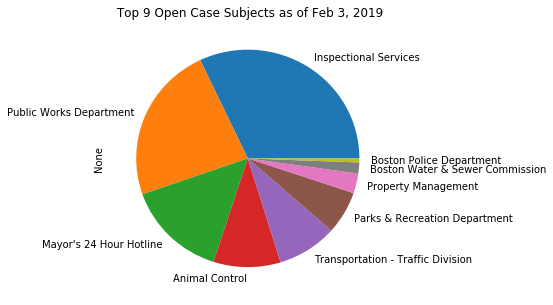

In [75]:
open_cases.groupby(['subject']).size().sort_values(ascending=False)[:9].plot.pie(figsize=(5, 5), title = ' Top 9 Open Case Subjects as of Feb 3, 2019')

# On Time

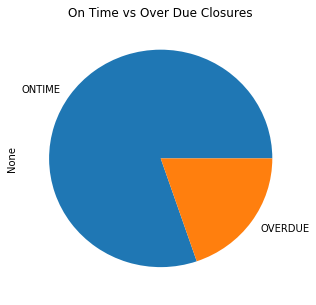

In [188]:
data.groupby(['ontime']).size().sort_values(ascending=False).plot.pie(figsize=(5, 5), title = 'On Time vs Over Due Closures')

# Case Status

In [49]:
data.groupby(['case_status']).size().sort_values(ascending=False)

case_status
Closed    1324645
Open       113967
dtype: int64

# Closure Reason

In [48]:
data.groupby(['closure_reason']).size().sort_values(ascending=False)

closure_reason
Case Closed Bulk Item Automation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          59893
Case Closed Case Resolved                                                                                                                

# Subject of 311 Call

In [184]:
data.groupby(['subject']).size().sort_values(ascending=False)

subject
Public Works Department              851429
Transportation - Traffic Division    233015
Inspectional Services                149545
Parks & Recreation Department         85596
Mayor's 24 Hour Hotline               53881
Property Management                   30317
Animal Control                        15536
Boston Water & Sewer Commission        8988
Civil Rights                           6974
Disability Department                  2112
Boston Police Department                792
Neighborhood Services                   131
Veterans                                 95
Consumer Affairs & Licensing             80
Youthline                                72
City Hall Truck                          37
Women's Commission                       11
CRM Application                           1
dtype: int64

# Reason

In [32]:
data.groupby(['reason']).size().sort_values(ascending=False)

reason
Sanitation                                 220594
Street Cleaning                            213794
Highway Maintenance                        197927
Enforcement & Abandoned Vehicles           140693
Signs & Signals                             81674
Code Enforcement                            79972
Street Lights                               77614
Building                                    58803
Housing                                     56923
Trees                                       55662
Recycling                                   53064
Graffiti                                    30317
Park Maintenance & Safety                   28131
Employee & General Comments                 27357
Environmental Services                      25153
Animal Issues                               15536
Administrative & General Requests           14147
Needle Program                              11173
Health                                       7713
Notification                               

# Type

In [33]:
data.groupby(['type']).size().sort_values(ascending=False)

type
Parking Enforcement                                117741
Schedule a Bulk Item Pickup                        107709
Requests for Street Cleaning                        98494
Missed Trash/Recycling/Yard Waste/Bulk Item         76418
Request for Pothole Repair                          67161
Request for Snow Plowing                            63259
Street Light Outages                                56069
Improper Storage of Trash (Barrels)                 36640
Pothole Repair (Internal)                           34900
Sidewalk Repair (Make Safe)                         34188
Tree Maintenance Requests                           33064
Sign Repair                                         32308
Schedule a Bulk Item Pickup SS                      31982
Graffiti Removal                                    30317
CE Collection                                       28401
Request for Recycling Cart                          25593
Unsatisfactory Living Conditions                    24708
Abandoned

# Queue

In [34]:
data.groupby(['queue']).size().sort_values(ascending=False)

queue
PWDx_Schedule a Bulk Item Pickup                             139625
BTDT_Parking Enforcement                                     115555
PWDx_Code Enforcement                                         84705
PWDx_Missed Trash\Recycling\Yard Waste\Bulk Item              81004
ISD_Building (INTERNAL)                                       59066
ISD_Housing (INTERNAL)                                        56904
PWDx_District 1C: Downtown                                    43634
PWDx_District 03: North Dorchester                            37839
PWDx_Street Light Outages                                     37596
PWDx_District 07: South Dorchester                            34160
PWDx_District 06: West Roxbury and Roslindale                 30713
INFO01_GenericeFormforOtherServiceRequestTypes                30114
BTDT_Sign Shop_Sign Installation                              28533
PARK_Tree Maintenance Request                                 27916
PWDx_District 02: Jamaica Plain           

# Location

In [35]:
data.groupby(['location']).size().sort_values(ascending=False)

location
1 City Hall Plz  Boston  MA  02108                                         4254
100 City Hall Plz  Boston  MA  02108                                       1383
INTERSECTION of Cross St & Hanover St  Boston  MA                           476
INTERSECTION of Causeway St & N Washington St  Boston  MA                   407
120-134 Harrison Ave  Boston  MA  02111                                     385
139 Tremont St  Boston  MA  02108                                           378
INTERSECTION of Austin St & New Rutherford Ave  Charlestown  MA             376
INTERSECTION of Massachusetts Ave & Newbury St  Boston  MA                  347
INTERSECTION of Brighton Ave & Harvard Ave  Allston  MA                     337
835 Huntington Ave  Boston  MA  02115                                       333
855 Washington St  Boston  MA  02111                                        333
INTERSECTION of Massachusetts Ave & Southampton St  Roxbury  MA             331
INTERSECTION of Berkeley St & E

# Fire District

In [36]:
data.groupby(['fire_district']).size().sort_values(ascending=False)

fire_district
4.0     204317
7.0     183863
12.0    181189
9.0     181027
3.0     167756
8.0     164543
6.0     115893
11.0    108911
1.0      78377
5.0         51
10.0        49
dtype: int64

# PWD District

In [37]:
data.groupby(['pwd_district']).size().sort_values(ascending=False)

pwd_district
1C     184544
07     153775
03     147597
04     110626
02     104543
06     104055
1B     102941
05     102778
10B     95383
10A     80929
08      78634
09      78212
1A      44120
9         139
5         121
2         117
3          81
6          50
4          43
7          30
8           1
dtype: int64

# City Council District

In [38]:
data.groupby(['city_council_district']).size().sort_values(ascending=False)

city_council_district
2.0    225639
1.0    191528
6.0    164117
7.0    157424
5.0    137073
3.0    135199
8.0    132524
4.0    128282
9.0    116671
0.0      1862
dtype: int64

# Police District

In [39]:
data.groupby(['police_district']).size().sort_values(ascending=False)

police_district
D4      183072
C11     158649
A1      156066
B2      144212
C6      117319
E5      115596
D14     110614
E13      98669
B3       95422
E18      86549
A7       78369
A15      44103
C-11        67
B-2         62
E-13        41
E-5         31
D-14        28
A-15        21
E-18        19
B-3         17
D-4         13
C-6          8
A-7          6
dtype: int64

# Neighborhood

In [40]:
data.groupby(['neighborhood']).size().sort_values(ascending=False)

neighborhood
Dorchester                                      210480
Roxbury                                         128840
Allston / Brighton                              102947
South Boston / South Boston Waterfront           96527
Jamaica Plain                                    96493
Downtown / Financial District                    86451
East Boston                                      78393
West Roxbury                                     68208
Hyde Park                                        68109
South End                                        67159
Greater Mattapan                                 66141
Back Bay                                         65991
Roslindale                                       60317
Charlestown                                      44177
Beacon Hill                                      37319
Boston                                           35454
Fenway / Kenmore / Audubon Circle / Longwood     32541
Mission Hill                                     259

# Ward

In [41]:
data.groupby(['ward']).size().sort_values(ascending=False)

ward
Ward 18    99501
Ward 5     82632
Ward 20    81282
Ward 3     76969
Ward 1     64435
Ward 14    52225
Ward 19    50276
Ward 16    48967
Ward 17    48956
Ward 22    48584
Ward 6     46676
Ward 21    44136
Ward 7     41383
Ward 4     38349
Ward 11    37208
Ward 13    33574
Ward 15    32735
Ward 12    31203
Ward 2     31053
Ward 8     28146
Ward 10    28145
Ward 9     26705
3          25071
03         22727
5          18071
18         16489
21         14916
20         12224
19         12030
05         11554
11         11410
06         10578
14         10434
4          10394
16         10279
22          9996
04          9790
6           9091
12          8700
10          8560
8           7661
01          7355
09          6898
9           6713
1           6607
02          6552
13          6550
2           6542
08          6531
17          6466
7           6109
07          5575
15          4858
0            492
00             8
dtype: int64

# Precinct

In [42]:
data.groupby(['precinct']).size().sort_values(ascending=False)

precinct
0306      36240
0308      26134
0501      20087
0601      15315
0307      14223
0509      14109
0504      12943
0503      12881
0802      12830
0301      12515
0303      12195
0905      10518
1401       9371
0507       9277
0402       9206
0201       9127
0508       9002
0304       8858
2005       8762
0604       8183
0605       8118
1907       8040
0401       7921
0903       7779
1504       7709
1818       7677
0404       7522
1808       7504
1807       7474
0902       7398
          ...  
2004.0       74
1904.0       74
1702.0       73
1007.0       73
2213.0       70
2101.0       69
2112.0       68
1503.0       67
1209.0       66
1909.0       66
2111.0       65
406.0        64
114.0        64
409.0        64
1711.0       63
1707.0       62
801.0        61
2107.0       58
2110.0       56
2114.0       53
2102.0       52
2108.0       51
2116.0       51
2115.0       48
1302.0       40
1303.0       31
1811.0       31
707.0        26
1001.0       11
1823.0        4
Length: 507, dt

# Location Street Name

In [44]:
data.groupby(['location_street_name']).size().sort_values(ascending=False)

location_street_name
1 City Hall Plz                                      4259
100 City Hall Plz                                    1383
INTERSECTION Cross St & Hanover St                    476
INTERSECTION Causeway St & N Washington St            407
120-134 Harrison Ave                                  385
139 Tremont St                                        380
INTERSECTION Austin St & New Rutherford Ave           376
INTERSECTION Columbus Ave & Centre St                 353
INTERSECTION Massachusetts Ave & Newbury St           347
INTERSECTION Brighton Ave & Harvard Ave               337
855 Washington St                                     336
835 Huntington Ave                                    333
INTERSECTION Massachusetts Ave & Southampton St       331
INTERSECTION Berkeley St & E Berkeley St              326
INTERSECTION Massachusetts Ave & Melnea Cass Blvd     326
INTERSECTION Columbus Ave & Dartmouth St              321
INTERSECTION Massachusetts Ave & Huntington Ave    

# Location Zipcode

In [45]:
data.groupby(['location_zipcode']).size().sort_values(ascending=False)

location_zipcode
2124.0    86664
2127.0    76473
2130.0    70805
2128.0    66680
2125.0    58456
2135.0    58377
2132.0    57481
2118.0    53729
2131.0    53175
2119.0    52183
2136.0    49247
2116.0    46655
2121.0    45331
2122.0    43773
2126.0    42609
2129.0    32526
2114.0    30191
2134.0    29064
2115.0    25161
2215.0    21259
2113.0    21217
2120.0    20527
2108.0    20247
2111.0    13749
2109.0     9413
2110.0     4856
2210.0     4798
2467.0     1042
2199.0      728
2163.0      135
2203.0       56
2133.0       40
2167.0        9
2222.0        8
2446.0        7
2146.0        6
2201.0        5
2445.0        2
2026.0        1
dtype: int64

# Source

In [47]:
data.groupby(['source']).size().sort_values(ascending=False)

source
Constituent Call        651573
Citizens Connect App    386759
City Worker App         146259
Employee Generated      129645
Self Service            114474
Maximo Integration        8329
Twitter                   1573
dtype: int64

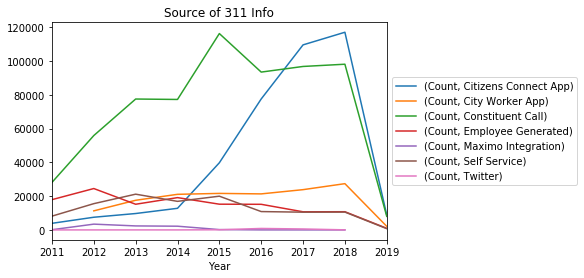

In [78]:
source_year_data = data[['source', 'open_dt_year', 'case_enquiry_id']]
source_year_data.columns = ['Source', 'Year', 'Count']
source_year_data.groupby(['Source','Year']).agg('count').unstack(level=0).plot(legend = True, title = 'Source of 311 Info').legend(loc='center left', bbox_to_anchor=(1, 0.5))